In [1]:
from shapely.geometry import Polygon, MultiPolygon
import shapely.geometry as geo
import shapely.affinity as af
from matplotlib import pyplot
from descartes import PolygonPatch
import numpy as np

Define a tesselation of two squares adjacent to each other, on the same base line.
On top of this define a square grid (simple tesselation) at an angle

In [5]:
size= (5, 2)
grid= np.sqrt( np.square(size[0] + np.square(size[1])))
angle= np.arctan( size[0] / size[1])

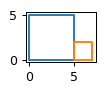

In [7]:
tile= MultiPolygon (
    [geo.box(0,0,size[0],size[0]),
    geo.box(size[0],0,size[0]+size[1],size[1]),
    ])
fig1= pyplot.figure(1, dpi=90, figsize=(1,1),)
plot=fig1.add_subplot(111)

def plot_tile( plot, tile):
    for p in tile.geoms:    
        x,y= p.exterior.xy
        plot.plot(x,y)
plot_tile(plot,  tile)
plot.set_aspect('equal')
pyplot.show()

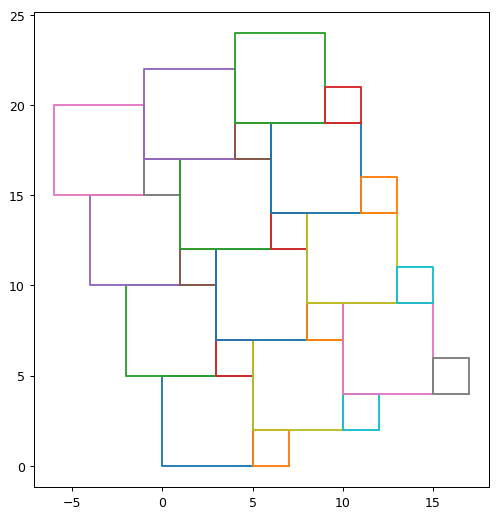

In [12]:
tess=[]
fig2_plt= pyplot.figure(1, figsize=(size[0]+size[1],size[0]+size[1],), dpi=90)\
    .add_subplot(111)
for x in range(3):
    for y in range(4):
        t= af.translate( tile, x*size[0]-y*size[1], y*size[0]+ x*size[1])
        plot_tile(fig2_plt, t)
fig2_plt.set_aspect('equal')
pyplot.show()